# CNN Prediction

In [14]:
import keras
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X = pd.read_csv('X.csv', index_col=0)
Y = pd.read_csv('Y.csv', index_col=0)

In [15]:
%%capture train

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Transpose the dataset
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train =np.array(y_train)
y_test = np.array(y_test)


model = keras.Sequential([
    Conv1D(512, kernel_size=15, activation='relu', input_shape=(885, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(256, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.3496 - mean_absolute_error: 0.4246
Test Mean Absolute Error: 0.4238864481449127
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


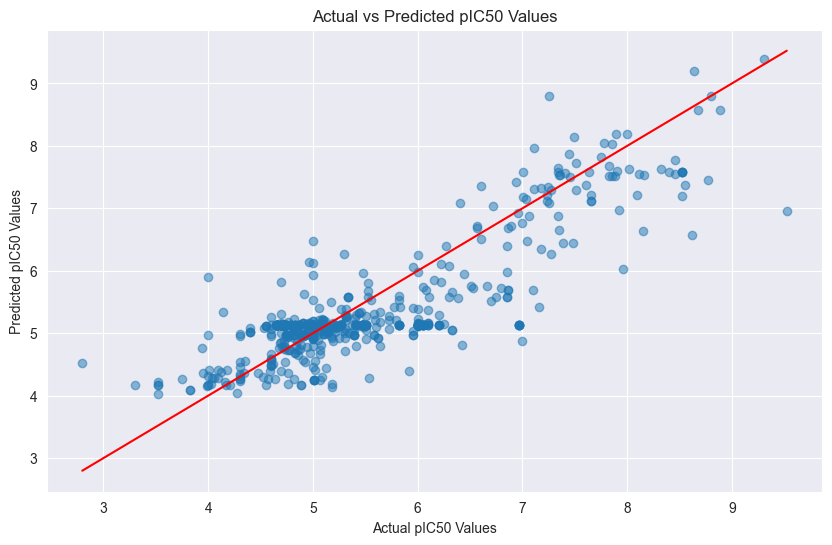

In [16]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual pIC50 Values')
plt.ylabel('Predicted pIC50 Values')
plt.title('Actual vs Predicted pIC50 Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of equality
plt.show()

In [17]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.7140015578281842
